## **MACD Histogram Reversal**
**Rationale**
- If MACD histogram changes from negative to positive, it signals a trend reversal into a bullish trend.
- Likewise, if MACD histogram changes from positive to negative, it signals a trend reversal into a bearish trend.
- Identify Trend Reversals using MACD Signal for buy-in

**Aim of this notebook**
- Explore the popular MACD indicator 

**Limitations**
1. Operates at 1 hour intervals due to Yahoo Finance limitations.
- If it is a viable strategy, use API to convert to shorter time frames, such as 5 or 15 min intervals.

## **MACD Indicator**
**Understanding the MACD Indicator**

The MACD (Moving Average Convergence Divergence) indicator is a type of trend-following momentum indicator and it is mainly used to identify changes in the strength, direction, momentum, and duration of a trend.

**Formula**

It is calculated by subtracting the Long Term Moving Average(26-period EMA) from the Short Term Moving Average(12-period EMA) and can be represented with the following equation: 
$$
\text{MACD Line} = EMA(12) - EMA(26)
$$

As we can see from the above formula, the MACD aims to capture the difference between the short term momentum and the long term momentum.

**Steps on how to use MACD Indicator to perform trades**

1. Obtain the MACD Line, MACD Signal Line, and MACD Histogram
2. Monitor the MACD Histogram for potential entries
3. Set appropriate take-profit and stop-losses for each entry

NOTE: This is a very simple strategy designed solely for research purposes and is not intended to be profitable.


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta

from datetime import datetime

**Gather Historical Data for the stock of interest**
- For this notebook, we will analyse the stock: NVIDIA (Ticker Symbol: NVDA)

In [3]:
def get_historical_data(ticker):
    data = pd.DataFrame()
    stock_data = yf.download(
        ticker,
        start=datetime(2024, 1, 1),
        end=datetime(2024, 10, 1),
        interval='1h',
        prepost=True
    )

    data_ticker = stock_data[['Open', 'High', 'Low', 'Close']]

    data_ticker.columns = [f"{col}" for col in data_ticker.columns]

    data = pd.concat([data, data_ticker], axis=1)
    return data


In [4]:
df = get_historical_data('NVDA')
df.tail(10)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Datetime,,,,
2024-09-30 10:30:00-04:00,120.099998,120.973801,119.660004,120.973801
2024-09-30 11:30:00-04:00,121.065002,121.099998,120.260002,120.714996
2024-09-30 12:30:00-04:00,120.720001,120.809998,119.959999,120.100700
2024-09-30 13:30:00-04:00,120.105003,120.690002,119.180000,119.470001
2024-09-30 14:30:00-04:00,119.470001,120.360001,119.190002,120.084999
2024-09-30 15:30:00-04:00,120.080002,121.500000,119.819702,121.489998
2024-09-30 16:00:00-04:00,121.500000,126.470000,119.410000,121.200000
2024-09-30 17:00:00-04:00,121.200000,127.999600,120.700000,121.060000
2024-09-30 18:00:00-04:00,121.060000,121.140000,120.950000,121.080000


**Calculate the relevant MACD values**

In [7]:
df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
df.tail(10)

,Open,High,Low,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Datetime,,,,,,,
2024-09-30 10:30:00-04:00,120.099998,120.973801,119.660004,120.973801,-0.845603,0.094182,-0.939785
2024-09-30 11:30:00-04:00,121.065002,121.099998,120.260002,120.714996,-0.711474,0.182648,-0.894122
2024-09-30 12:30:00-04:00,120.720001,120.809998,119.959999,120.100700,-0.647283,0.197472,-0.844755
2024-09-30 13:30:00-04:00,120.105003,120.690002,119.180000,119.470001,-0.639927,0.163862,-0.803789
2024-09-30 14:30:00-04:00,119.470001,120.360001,119.190002,120.084999,-0.577811,0.180783,-0.758593
2024-09-30 15:30:00-04:00,120.080002,121.500000,119.819702,121.489998,-0.410480,0.278491,-0.688971
2024-09-30 16:00:00-04:00,121.500000,126.470000,119.410000,121.200000,-0.297836,0.312907,-0.610744
2024-09-30 17:00:00-04:00,121.200000,127.999600,120.700000,121.060000,-0.217357,0.314710,-0.532066
2024-09-30 18:00:00-04:00,121.060000,121.140000,120.950000,121.080000,-0.150230,0.305469,-0.455699


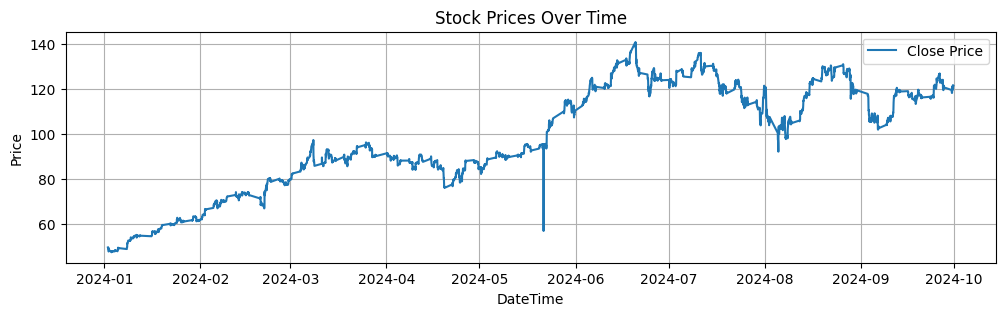

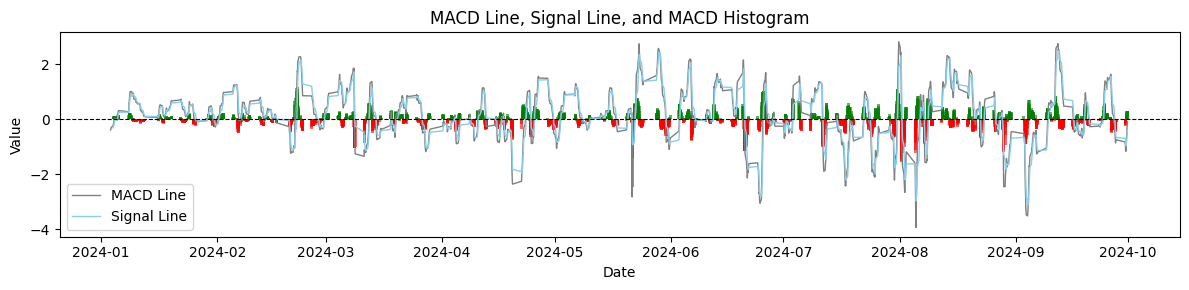

In [5]:
plt.figure(figsize=(12, 3))

# Plot Close prices
plt.plot(df.index, df['Close'], label='Close Price', alpha=1)

plt.title('Stock Prices Over Time')
plt.xlabel('DateTime')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 3))

# Plot MACD Line and Signal Line
plt.plot(df.index, df['MACD_12_26_9'], label='MACD Line', color='grey', linewidth=1)
plt.plot(df.index, df['MACDs_12_26_9'], label='Signal Line', color='skyblue', linewidth=1)

# Plot MACD Histogram
bars = plt.bar(df.index, df['MACDh_12_26_9'], 
                color=['green' if x > 0 else 'red' for x in df['MACDh_12_26_9']], 
                alpha=0.6)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.title('MACD Line, Signal Line, and MACD Histogram')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


**Implement Strategy**

Now that we have obtained the relevant MACD Histogram values, we can start to implement our strategy.

1. Find Potential Entry Points
    - Histogram value changes from negative to positive -> Signals Uptrend (ENTER LONG)
    - Histogram value changes from postive to negative -> Signals Downtrend (ENTER SHORT)
2. Find Stop Loss and Take Profit for each Entry Point
    - We will position our stop loss at -2% and take profit at +6% (1:3 Risk-Reward Ratio)
3. Run Back-Tests

In [6]:
def calculate_price_hit(net_revenue, wins, losses, curr_holdings, high, low):
  temp_holdings = []
  if len(curr_holdings) > 0:
      for holdings in curr_holdings:
        if high > holdings[2]:
          profit = round(holdings[2] - holdings[1],2)
          net_revenue += profit
          wins += 1

        # Do not sell if candle that was bought on have lower Low Price as it could have been due to sharp increase which cause MACD to pivot
        elif low < holdings[0] and holdings[3] == 0:
          loss = round(holdings[0] - holdings[1],2)
          net_revenue += loss
          losses+= 1

        # If at this iteration, no sell has occurred -> put back to holdings
        else:
          holdings[3] = 0
          temp_holdings.append(holdings)

      curr_holdings = temp_holdings

  return net_revenue, wins, losses, curr_holdings

# MACD_LOGIC
def calculate_macd_win_loss_with_reversal(df):
  prev_signal, curr_signal, wins, losses, net_revenue = 0, 0, 0, 0, 0
  curr_holdings = []

  df_macd_hist = df['MACDh_12_26_9'].values
  df_open_prices = df['Open'].values
  df_close_prices = df['Close'].values
  df_high_prices = df['High'].values
  df_low_prices = df['Low'].values

  for i in range(len(df)):
    # Identify Current Signal
    if df_macd_hist[i] < 0:
      curr_signal = -1
    elif df_macd_hist[i] >= 0:
      curr_signal = 1
    else:
      curr_signal = 0

    # IF change in signal, check if signal shifted from negative to positive
    if curr_signal != prev_signal:
      if curr_signal > 0 and prev_signal < 0:
        curr_price = round((df_open_prices[i] + df_close_prices[i])/2, 2)
        stop_loss_price = round(curr_price * 0.98, 2)
        profit_price = round(curr_price * 1.06, 2)
        curr_holdings.append([stop_loss_price, curr_price, profit_price, 1])

      # Set signal for next iteration
      prev_signal = curr_signal

    # Check through ALL holdings to see if at this current iteration(candle), if any take-profit or stop-loss has been hit
    net_revenue, wins, losses, curr_holdings = calculate_price_hit(net_revenue, wins, losses, curr_holdings, df_high_prices[i], df_low_prices[i])

  return [net_revenue, wins, losses, len(curr_holdings)]

In [7]:
result = calculate_macd_win_loss_with_reversal(df)

print(f" Net Revenue: ${round(result[0],2)}, Wins: {result[1]}, Losses: {result[2]}, Open Positions: {result[3]}")

 Net Revenue: $124.13, Wins: 42, Losses: 63, Open Positions: 0


**Remarks**
- Despite the Negative W/L, we managed to obtain a surprisingly positive net revenue of $124.13. 
    - This is likely due to the fact that we traded on a 1:3 Risk-Reward Ratio.

## **Future Works**
- This strategy can actually be a lot more sophisticated and profitable with more optimization techniques. 

- Some Optimization works that can be done for this strategy are listed below:

    1. Dynamic Stop Loss
        - Instead of fixed stop-loss and take-profit exit points, we can use short term support and resistance lines to more effectively gauge the optimal exit points.
    2. Trading on Strong/ Weak MACD Histogram Reversals Only
        - Instead of entering trades on every histogram reversal, we can calculate a minimum MACD histogram reversal percentage and enter only if a strong enough (large reversal percentage) MACD histogram reversal opportunity presents itself.
    3. Trading at Specific Timings Only
        - As Market tends to be more active during the market hours and less active with large movements in a single direction during the pre-market and after-hours, we can calculate and analyze the profitability of trading during specific trading hours.